# INDIVIDUAL PROJECT: Predict the onset of diabetes based on diagnostic measures

This case is from medical data analysis. In this field we have some properties that need to be adressed before even starting the project.
Problems in medical data science are:
1. Small datasets;
2. Missing data;
3. Corrupted data (false information: lie, flase positive/negative, bad testing etc)
4. Only interpretable algorithms are viable (in some countries it is stated in law)

So we need robust model (so it won't overfit and rely too heavy on the data) with interpretation that can handle missing data and small scale data.
Сonsidering all of the above models that I will try to use classic algorithm (often used in med applications) - Bayes Network.

About the [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database):

Diabetes Mellitus affects 422 million (dated 2014) people in the world or 8.5% of adult (over 18 years), causing 1.5–5.0 million per year (1.6 million caused by diabetes and 2.2 caused by high blood glucose in 2016).

The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years,
which included an oral glucose tolerance test. Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care. In addition to being a familiar database to the investigators, this data set provided a well validated data resource in which to explore prediction of the date of onset of diabetes in a longitudinal manner.

Eight variables were chosen to form the basis for forecasting the onset of diabetes within five years in Pima Indian women (those variables were chosen because they have been found to be significant risk factors for diabetes among Pimas or other populations)

1. Number of times pregnant
2. Plasma Glucose Concentration at 2 Hours in an Oral Glucose Tolerance Test (GTIT)
3. Diastolic Blood Pressure ($mmHg$)
4. Triceps Skin Fold Thickness ($mm$)
5. 2-Hour Serum Insulin ($\mu U/ml$)
6. Body Mass Index ($Weight(kg) / Height (m)^2$)
7. Diabetes Pedigree Function
8. Age (years)



## Understanding the task

1. Number of times pregnant: during pregnancy woman can develop gestational diabetes: have high blood sugar levels, but those levels were normal before pregnancy. After childbirth, gestational diabetes usually goes away. But gestational diabetes makes woman more likely to develop type 2 diabetes. [[source]](https://www.webmd.com/diabetes/gestational-diabetes-guide/gestational-diabetes)


2. Plasma Glucose Concentration at 2 Hours in an Oral Glucose Tolerance Test (GTIT): a glucose tolerance test measures how well your body’s cells are able to absorb glucose (sugar) after you consume a specific amount of sugar. Doctors use fasting blood sugar levels and hemoglobin A1c values to diagnose type 1 and type 2 diabetes as well as prediabetes. A two-hour, 75-gram oral glucose tolerance test (OGTT) is used to test for diabetes or glucose tolerance. These are the charts to evaluate results [[source]](https://www.healthline.com/health/glucose-tolerance-test)

   - For prediabetes: 140–199 mg/dL
    
   - For diabetes: 200 mg/dL or greater
    
   - For gestational diabetes: >153 mg/dL
 

3. Diastolic Blood Pressure: high blood pressure, or hypertension, is a condition that’s seen in people with type 2 diabetes. It’s unknown why there’s such a significant relationship between the two diseases. It’s believed that the following contribute to both conditions: obesity, a diet high in fat and sodium, chronic inflammation, inactivity. [[source]](https://www.healthline.com/health/type-2-diabetes/hypertension)


4. Triceps Skinfold Thickness: skin fold thickness measurement provides an estimated size of the subcutaneous fat, which is the layer of subcutaneous tissue and composed of adipocytes. Subcutaneous fat is the major determinant of insulin sensitivity and has a strong association with insulin resistance. However, evidence to predict,the effect of duration of diabetes on skin fold thickness remains unclear. [[source]](https://pdfs.semanticscholar.org/5d68/b7a7391272feb9a737f4d69539483deb2556.pdf)

     - Control group has around 16.7
     - group <5 years of diabetes 30.45
     - group 5-10 years of diabetes 31
     - group >10 years of diabetes 38.09.


5. 2-Hour Serum Insulin: appears to be a good indicator of insulin resistance. It can be a useful tool, especially in low resource setting where a single sample can confirm the diagnosis, thus reducing cost and repeat visits. [[source]](https://search.proquest.com/openview/f218efe6291008a23ac0b3b57e332e60/1?pq-origsite=gscholar&cbl=226481)


6. Body Mass Index (Weight in kg / (Height in m)^2) [[source]](https://en.wikipedia.org/wiki/Body_mass_index): 

    - Underweight = <18.5
    
    - Normal weight = 18.5–24.9 
    
    - Overweight = 25–29.9 
    
    - Obesity = BMI of 30 or greater


7. Diabetes Pedigree Function (DPF): provide a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject. The DPF uses information from parents, grandparents, full and half siblings, full and half aunts and uncles, and first cousins. It provides a measure of the expected genetic influence of affected and unaffected relatives on the subject's eventual diabetes risk. **This function is not validated.** [[source]](https://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC2245318&blobtype=pdf)


8. Age (years): middle-aged and older adults are still at the highest risk for developing type 2 diabetes. According to the CDC’s 2017 National Diabetes Statistics Report, there were around 1.5 million new total diabetes cases among adults in 2015. In 2015, adults aged 45 to 64 were the most diagnosed age group for diabetes. New cases of both type 1 and type 2 diabetes in people aged 18 years and older were distributed as follows [[source]](https://www.healthline.com/health/type-2-diabetes-age-of-onset):

    - ages 18 to 44: 355,000 new cases
    
    - ages 45 to 64: 809,000 new cases
    
    - age 65 and older: 366,000 new cases
    
   So the risk group is **45-64** years
    

## EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline

from pomegranate import BayesianNetwork
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Features Glucose, BloodPressure, SkinThickness, Insulin, BMI have minimum value equal to 0. That indicates an invalid or missing value. I will mark them as NaN, so my EDA will be cleaner and BN will understand that this number is missing and it needs to infer it.

In [6]:
df['Glucose'].replace(to_replace=0, value=np.NaN,  inplace=True)
df['BloodPressure'].replace(to_replace=0, value=np.NaN,  inplace=True)
df['SkinThickness'].replace(to_replace=0, value=np.NaN,  inplace=True)
df['Insulin'].replace(to_replace=0, value=np.NaN,  inplace=True)
df['BMI'].replace(to_replace=0, value=np.NaN,  inplace=True)

After imputing NaN we have 392/768 objects to work with (half of the objects have missing values). It's not that bad for EDA, since I am looking for some general tendencies and I should find them (if there any) even in 50% of the data.

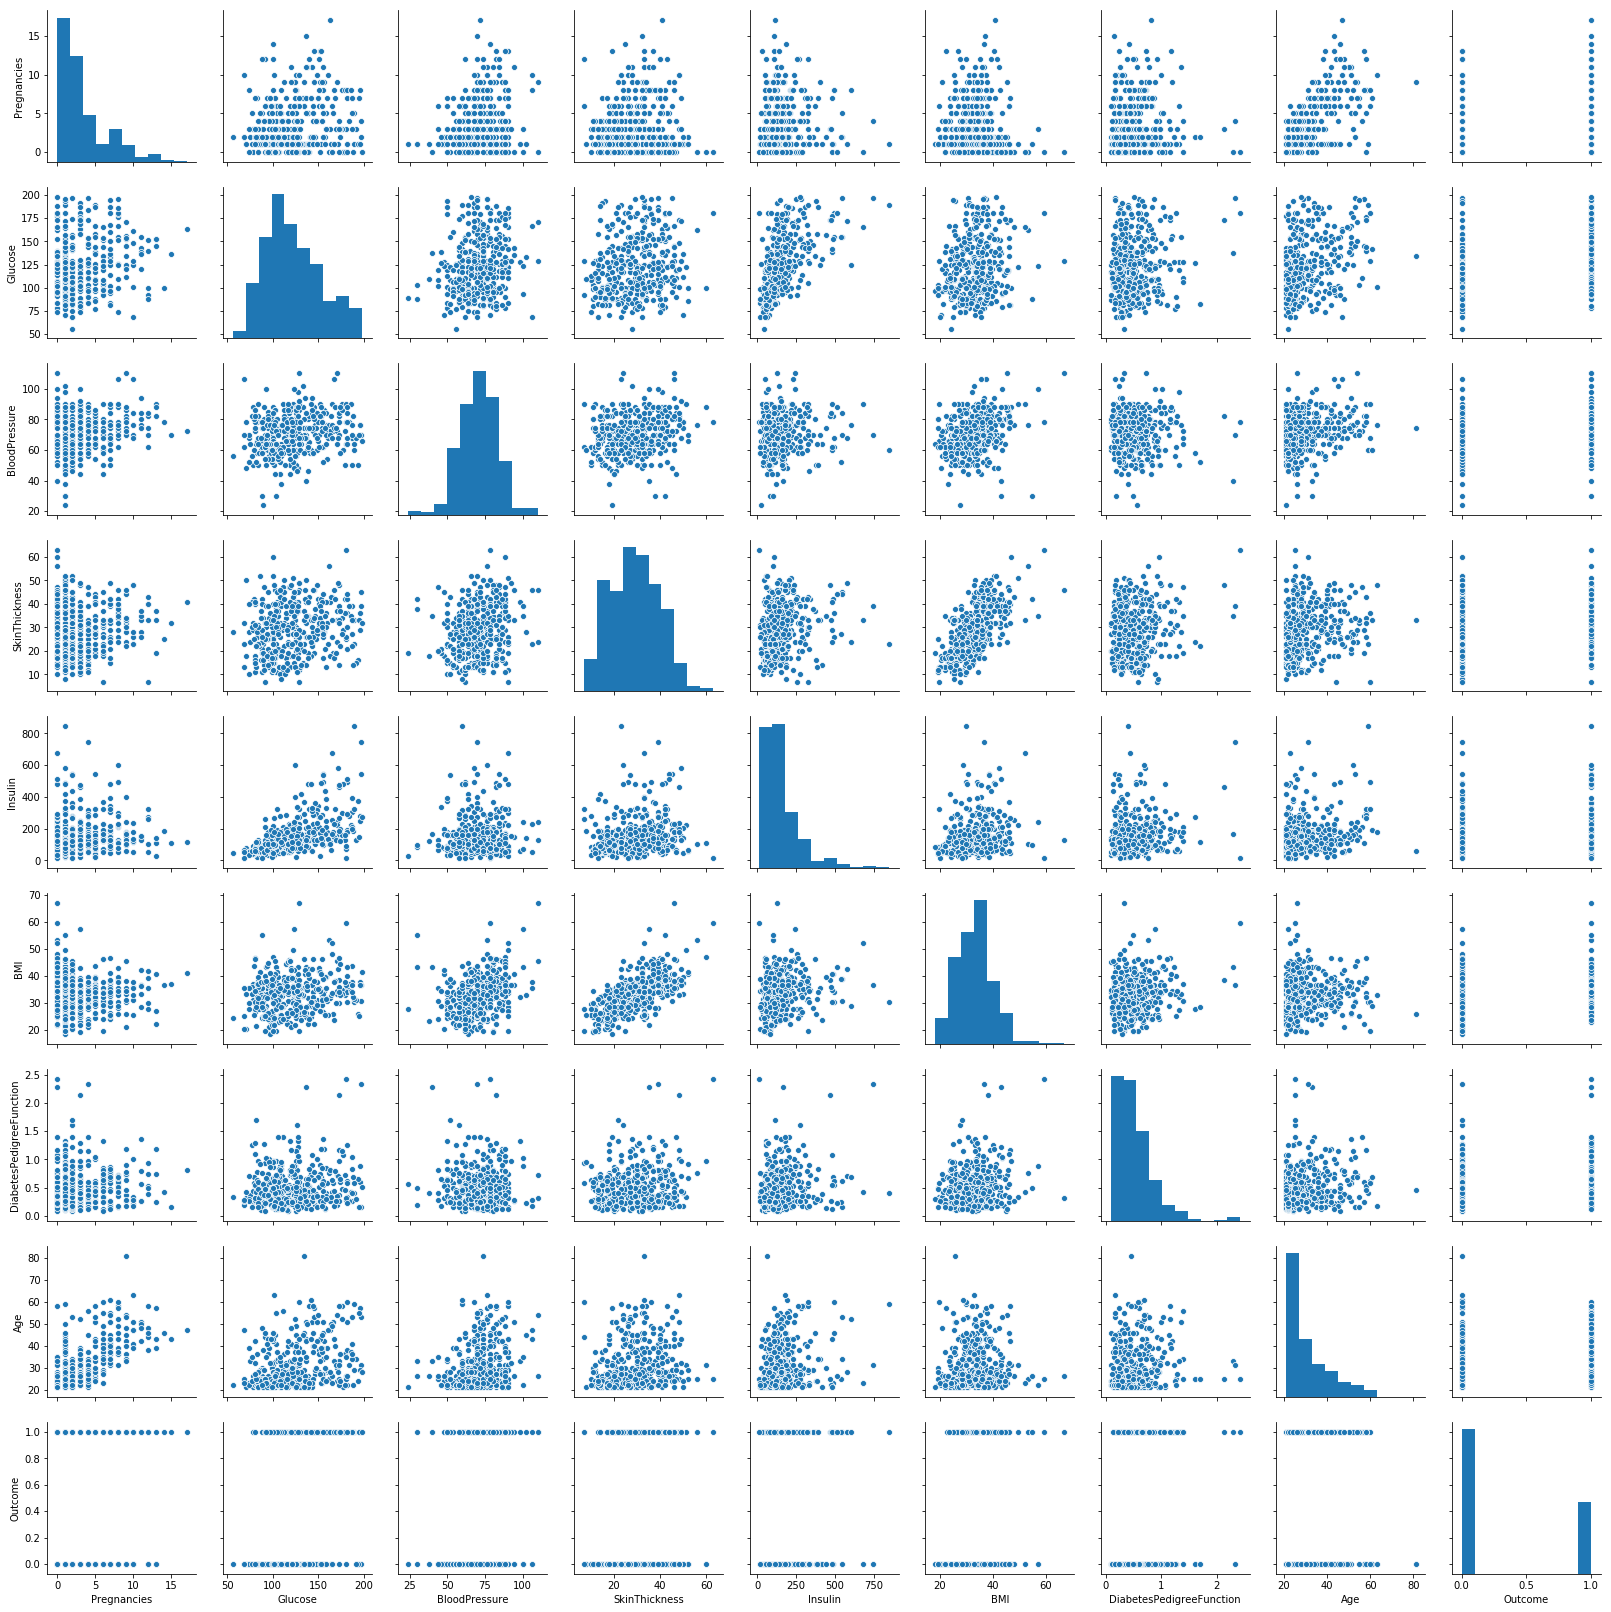

In [7]:
sns.pairplot(df.dropna())

For this task I will use Bayesian Network from pomegranate. It supports only categorical values, no continuous features.

Now looking closely to every feature.
Pregnancy: feature easy to get (anamnesis). The only concern is inaccurate information. Maybe transforming this feature to simple Yes/No question won't hurt the model and will reduce the possibility of jeopardizing data.

### Pregnancy

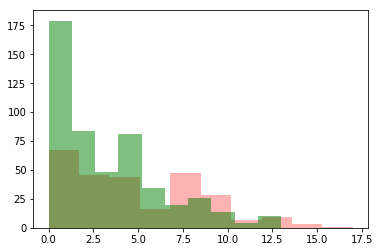

In [8]:
plt.hist(df[df['Outcome'] == 1]['Pregnancies'], color='red', alpha=0.3, bins=10);
plt.hist(df[df['Outcome'] == 0]['Pregnancies'], color='green', alpha=0.5, bins=10);

Let's compare distributions

In [9]:
stats.ks_2samp(df[df['Outcome'] == 1]['Pregnancies'], df[df['Outcome'] == 0]['Pregnancies'])

Ks_2sampResult(statistic=0.20647761194029846, pvalue=5.17391682825995e-07)

Came from the same distribution, so we will have to split them manually. We can see the differences starts from 7 or so pregnancies. I will check thresholds for "jump" in class distributions.

In [10]:
threshold = 7
df[df['Pregnancies'] > threshold]['Outcome'].value_counts(normalize=True)

1    0.564516
0    0.435484
Name: Outcome, dtype: float64

6 and 7 is good thresholds.

### Glucose

Glucose is our magic feature since it's the most accurate feature to predict diabetes in medicine (by doctors)

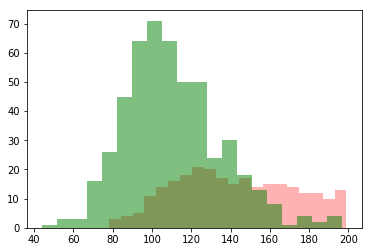

In [11]:
plt.hist(df[df['Outcome'] == 1]['Glucose'].dropna(), color='red', alpha=0.3, bins=20);
plt.hist(df[df['Outcome'] == 0]['Glucose'].dropna(), color='green', alpha=0.5, bins=20);

Can be easily separated, they have different сentral tendencies

In [12]:
print('No diabetes: mean = {},'.format(df[df['Outcome'] == 0]['Glucose'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 0]['Glucose'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 0]['Glucose'].mode()[0]))

No diabetes: mean = 110.64386317907444, median = 107.0, mode = 99.0.


In [13]:
print('Diabetes: mean = {},'.format(df[df['Outcome'] == 1]['Glucose'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 1]['Glucose'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 1]['Glucose'].mode()[0]))

Diabetes: mean = 142.31954887218046, median = 140.0, mode = 125.0.


Domain knowledge threshold: 140 for pre-diabetes;

Data driven threshold: 125

In [11]:
df[df['Glucose'] > 140]['Outcome'].value_counts(normalize=True)

1    0.6875
0    0.3125
Name: Outcome, dtype: float64

In [12]:
df[df['Glucose'] < 125]['Outcome'].value_counts(normalize=True)

0    0.816372
1    0.183628
Name: Outcome, dtype: float64

### Blood Pressure

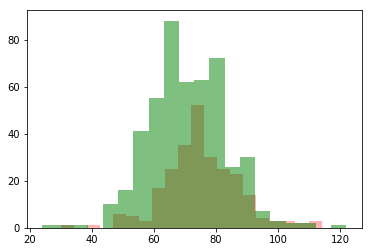

In [16]:
plt.hist(df[df['Outcome'] == 1]['BloodPressure'].dropna(), color='red', alpha=0.3, bins=20);
plt.hist(df[df['Outcome'] == 0]['BloodPressure'].dropna(), color='green', alpha=0.5, bins=20);

In [17]:
stats.ks_2samp(df[df['Outcome'] == 1]['BloodPressure'], df[df['Outcome'] == 0]['BloodPressure'])

Ks_2sampResult(statistic=0.16480597014925374, pvalue=0.0001271722026967837)

They are literally the same. Let's try to separate them

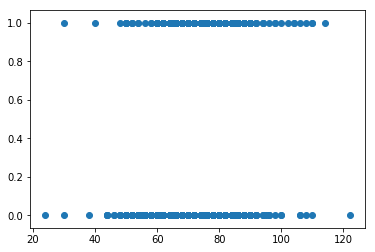

In [18]:
plt.scatter(df['BloodPressure'], df['Outcome'])

In [13]:
df[df['BloodPressure'] > 100]['Outcome'].value_counts(normalize=True)

1    0.615385
0    0.384615
Name: Outcome, dtype: float64

### Triceps Skin-Fold Thickness

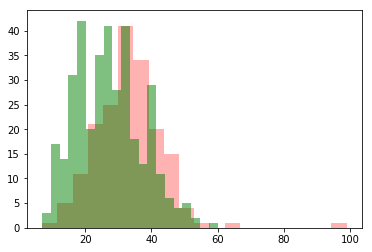

In [20]:
plt.hist(df[df['Outcome'] == 1]['SkinThickness'].dropna(), color='red', alpha=0.3, bins=20);
plt.hist(df[df['Outcome'] == 0]['SkinThickness'].dropna(), color='green', alpha=0.5, bins=20);

Checking central tendencies

In [21]:
print('No diabetes: mean = {},'.format(df[df['Outcome'] == 0]['SkinThickness'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 0]['SkinThickness'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 0]['SkinThickness'].mode()[0]))

No diabetes: mean = 27.235457063711912, median = 27.0, mode = 23.0.


In [22]:
print('Diabetes: mean = {},'.format(df[df['Outcome'] == 1]['SkinThickness'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 1]['SkinThickness'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 1]['SkinThickness'].mode()[0]))

Diabetes: mean = 33.0, median = 32.0, mode = 32.0.


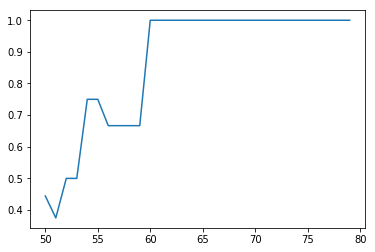

In [23]:
warnings.simplefilter('ignore', UserWarning)
ns = []
for n in np.arange(50, 80, 1):
    ns.append(df[df['SkinThickness'] > n][df['Outcome'] == 1]['Outcome'].size / (df[df['SkinThickness'] > n]['Outcome'].size))
plt.plot(np.arange(50, 80, 1), ns)

In [24]:
warnings.simplefilter('ignore', UserWarning)
df[df['SkinThickness'] > 55][df['Outcome'] == 1]['Outcome'].size / (df[df['SkinThickness'] > 55]['Outcome'].size)

0.75

### Insulin

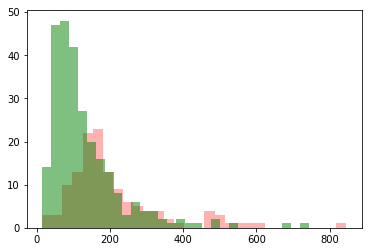

In [25]:
plt.hist(df[df['Outcome'] == 1]['Insulin'].dropna(), color='red', alpha=0.3, bins=30);
plt.hist(df[df['Outcome'] == 0]['Insulin'].dropna(), color='green', alpha=0.5, bins=30);

In [26]:
print('Diabetes: mode = {}'.format(df[df['Outcome'] == 1]['Insulin'].mean()))
print('No diabetes: mode = {}'.format(df[df['Outcome'] == 0]['Insulin'].mean()))

Diabetes: mode = 206.84615384615384
No diabetes: mode = 130.28787878787878


In [14]:
df[df['Insulin'] > 205]['Outcome'].value_counts(normalize=True)

1    0.54878
0    0.45122
Name: Outcome, dtype: float64

### BMI

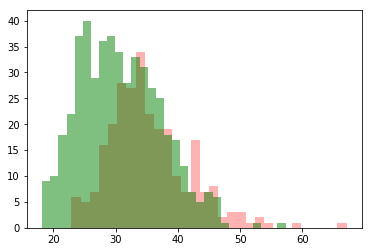

In [28]:
plt.hist(df[df['Outcome'] == 1]['BMI'].dropna(), color='red', alpha=0.3, bins=30);
plt.hist(df[df['Outcome'] == 0]['BMI'].dropna(), color='green', alpha=0.5, bins=30);

In [29]:
print('Diabetes: mean = {},'.format(df[df['Outcome'] == 1]['BMI'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 1]['BMI'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 1]['BMI'].mode()[0]))

Diabetes: mean = 35.40676691729318, median = 34.3, mode = 32.9.


In [30]:
print('No Diabetes: mean = {},'.format(df[df['Outcome'] == 0]['BMI'].mean()) + 
      ' median = {},'.format(df[df['Outcome'] == 0]['BMI'].median()) +
      ' mode = {}.'.format(df[df['Outcome'] == 0]['BMI'].mode()[0]))

No Diabetes: mean = 30.85967413441951, median = 30.1, mode = 32.0.


Checking domain knowledge: our threshold is 30, let's use it on both ways.

In [15]:
df[df['BMI'] < 30]['Outcome'].value_counts(normalize=True)

0    0.835088
1    0.164912
Name: Outcome, dtype: float64

### Diabetes Pedegree Function

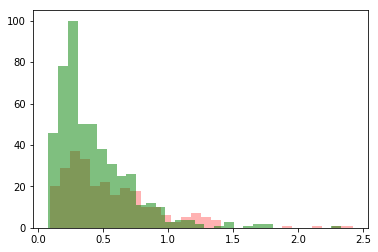

In [32]:
plt.hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].dropna(), color='red', alpha=0.3, bins=30);
plt.hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].dropna(), color='green', alpha=0.5, bins=30);

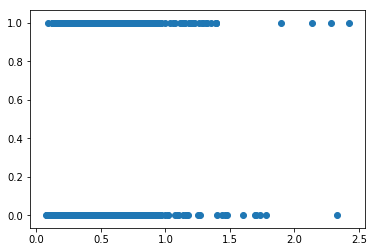

In [33]:
plt.scatter(df['DiabetesPedigreeFunction'], df['Outcome'])

In [16]:
df[df['DiabetesPedigreeFunction'] >= 1.1]['Outcome'].value_counts(normalize=True)

1    0.595238
0    0.404762
Name: Outcome, dtype: float64

This feature is not validated so we need to treat it carefully, maybe it will just bring the noise to the model

### Age

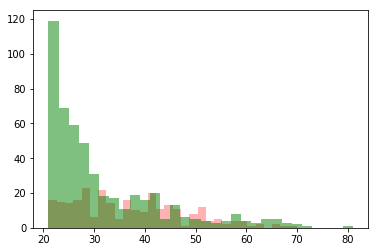

In [35]:
plt.hist(df[df['Outcome'] == 1]['Age'].dropna(), color='red', alpha=0.3, bins=30);
plt.hist(df[df['Outcome'] == 0]['Age'].dropna(), color='green', alpha=0.5, bins=30);

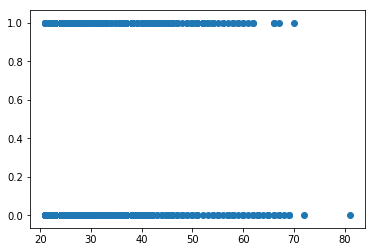

In [36]:
plt.scatter(df['Age'], df['Outcome'])

Using domain knowledge (it gives best separation between clsses judging by the histogramm)

In [17]:
df[(df['Age'] > 40) & (df['Age'] < 65)]['Outcome'].value_counts(normalize=True)

1    0.550562
0    0.449438
Name: Outcome, dtype: float64

### Feature Engineering: QUICKI

Let's create a surrogate index for predicting diabetes. [QUICKI](http://diabetes.diabetesjournals.org/content/54/7/1914.full-text.pdf) is kinda simple, accurate and meaningful metric, why not use it

In [19]:
df['QUICKI'] = 1 / (np.log(df['Insulin']) + np.log(df['Glucose']))

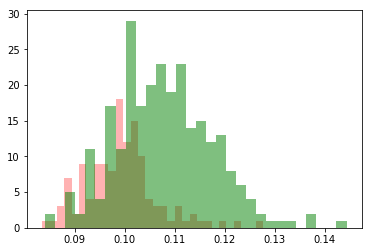

In [20]:
plt.hist(df[df['Outcome'] == 1]['QUICKI'].dropna(), color='red', alpha=0.3, bins=30);
plt.hist(df[df['Outcome'] == 0]['QUICKI'].dropna(), color='green', alpha=0.5, bins=30);

In [21]:
df[(df['QUICKI'] <= 0.1)]['Outcome'].value_counts(normalize=True)

1    0.590164
0    0.409836
Name: Outcome, dtype: float64

Creating binary features and saving NaNs

In [41]:
df['Pregnancy_risk'] =  (df['Pregnancies'] > 7).astype(int) #data driven, 7 gives better separation of classes
df['Pregnancy_risk'][df['Pregnancies'].isnull()] = np.NaN
df['Glucose_tolerance'] = (df['Glucose'] > 140).astype(int) #domain knowledge
df['Glucose_tolerance'][df['Glucose'].isnull()] = np.NaN
df['TSKT_risk_group'] =  (df['SkinThickness'] > 55).astype(int) #data driven
df['TSKT_risk_group'][df['SkinThickness'].isnull()] = np.NaN
df['Insulin_resistance'] = (df['Insulin'] > 205).astype(int) #data driven
df['Insulin_resistance'][df['Insulin'].isnull()] = np.NaN
df['Obesity'] =  (df['BMI'] < 27).astype(int) #data driven, model gives better results than with >30
df['Obesity'][df['BMI'].isnull()] = np.NaN
df['Age_risk'] = ((df['Age'] > 40) & (df['Age'] < 65)).astype(int) #domain knowledge
df['Age_risk'][df['Age'].isnull()] = np.NaN
df['DPF_risk'] = (df['DiabetesPedigreeFunction'] >= 1.1).astype(int) #data driven
df['DPF_risk'][df['DiabetesPedigreeFunction'].isnull()] = np.NaN
df['BP_risk'] = (df['BloodPressure'] > 100).astype(int) #data driven
df['BP_risk'][df['BloodPressure'].isnull()] = np.NaN
df['QUICKI_results'] = (df['QUICKI'] <= 0.1).astype(int) #domain knowledge
df['QUICKI_results'][df['QUICKI'].isnull()] = np.NaN

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,QUICKI,Pregnancy_risk,Glucose_tolerance,TSKT_risk_group,Insulin_resistance,Obesity,Age_risk,DPF_risk,BP_risk,QUICKI_results
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,NaN,0,1.0,0.0,NaN,0.0,1,0,0.0,NaN
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,NaN,0,0.0,0.0,NaN,1.0,0,0,0.0,NaN
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,NaN,1,1.0,NaN,NaN,1.0,0,0,0.0,NaN
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0.110718,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0.099562,0,0.0,0.0,0.0,0.0,0,1,0.0,1.0


In [43]:
work_features = ['Pregnancy_risk', 'Glucose_tolerance', 'TSKT_risk_group', 'Insulin_resistance', 'Obesity', 'Age_risk', 'DPF_risk', 'BP_risk', 'QUICKI_results']
work = df[work_features]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(work, df['Outcome'], test_size=0.3, random_state=1)

### Modeling

In [45]:
model = BayesianNetwork.from_samples(pd.concat([X_train, y_train], axis=1), algorithm='exact')

In [46]:
pred = np.array(model.predict(np.concatenate([X_test.values, np.full((231,1), None)], axis=1)))[:,-1]

For our final model I will use classification report since it gives more than enough information about results. 

Recall is more important here since we need to predict diabetes not diagnose it. If we will give false positive result it won't be that bad since preventive measures won't hurt patiens (more active lifestyle, less carbohydrates, checking BP and glucose levels, blood sugar controling diet etc).

For probability predictions I will use ROC AUC.

In [47]:
print(classification_report(y_test, pred.astype(int), labels=[0,1], target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.76      0.89      0.82       146
    Diabetes       0.73      0.52      0.61        85

   micro avg       0.75      0.75      0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [48]:
confusion_matrix(y_test, pred.astype(int))

array([[130,  16],
       [ 41,  44]], dtype=int64)

In [49]:
probes = []

In [50]:
for i in np.arange(0, len(X_test)):
    probes.append(model.predict_proba(np.concatenate([X_test.iloc[i], [None]]))[-1].items()[1][1])

In [51]:
roc_auc_score(y_test, probes)

0.837792103142627

### Model tuning

To chose features for final model I will use kinda dumb brute force: I will drop the feature and see the results. If results are better - feature should be dropped to improve our model. Hope it will converge to something meaningfull

In [52]:
for feature in work_features:
    print('Dropping ' + feature + ':')
    X_train, X_test, y_train, y_test = train_test_split(work.drop(feature, axis=1), df['Outcome'], test_size=0.3, random_state=1)
    model = BayesianNetwork.from_samples(pd.concat([X_train, y_train], axis=1), algorithm='exact')
    pred = np.array(model.predict(np.concatenate([X_test.values, np.full((231,1), None)], axis=1)))[:,-1]
    print('recall - {:.5f}'.format(recall_score(y_test, pred.astype(int))))
    probes = []
    for i in np.arange(0, len(X_test)):
        probes.append(model.predict_proba(np.concatenate([X_test.iloc[i], [None]]))[-1].items()[1][1])
    print('ROC AUC - {:.5f}'.format(roc_auc_score(y_test, probes)))

Dropping Pregnancy_risk:
recall - 0.50588
ROC AUC - 0.82172
Dropping Glucose_tolerance:
recall - 0.38824
ROC AUC - 0.78062
Dropping TSKT_risk_group:
recall - 0.51765
ROC AUC - 0.83779
Dropping Insulin_resistance:
recall - 0.50588
ROC AUC - 0.82732
Dropping Obesity:
recall - 0.48235
ROC AUC - 0.80459
Dropping Age_risk:
recall - 0.51765
ROC AUC - 0.83352
Dropping DPF_risk:
recall - 0.51765
ROC AUC - 0.83102
Dropping BP_risk:
recall - 0.51765
ROC AUC - 0.83618
Dropping QUICKI_results:
recall - 0.62353
ROC AUC - 0.82276


QUICKI was not so good (correlated with Glucose and Insulin plus has a lot more NaNs since we used 2 features with NaNs to get it), it improves our ROC but crushes recall. Ok, drop it

In [53]:
work_features = ['Pregnancy_risk', 'Glucose_tolerance', 'TSKT_risk_group', 'Insulin_resistance', 'Obesity', 'Age_risk', 'DPF_risk', 'BP_risk']
work = df[work_features]

In [54]:
for feature in work_features:
    print('Dropping ' + feature + ':')
    X_train, X_test, y_train, y_test = train_test_split(work.drop(feature, axis=1), df['Outcome'], test_size=0.3, random_state=1)
    model = BayesianNetwork.from_samples(pd.concat([X_train, y_train], axis=1), algorithm='exact')
    pred = np.array(model.predict(np.concatenate([X_test.values, np.full((231,1), None)], axis=1)))[:,-1]
    print('recall - {:.5f}'.format(recall_score(y_test, pred.astype(int))))
    probes = []
    for i in np.arange(0, len(X_test)):
        probes.append(model.predict_proba(np.concatenate([X_test.iloc[i], [None]]))[-1].items()[1][1])
    print('ROC AUC - {:.5f}'.format(roc_auc_score(y_test, probes)))

Dropping Pregnancy_risk:
recall - 0.62353
ROC AUC - 0.81809
Dropping Glucose_tolerance:
recall - 0.42353
ROC AUC - 0.74331
Dropping TSKT_risk_group:
recall - 0.62353
ROC AUC - 0.82276
Dropping Insulin_resistance:
recall - 0.58824
ROC AUC - 0.78936
Dropping Obesity:
recall - 0.55294
ROC AUC - 0.79057
Dropping Age_risk:
recall - 0.57647
ROC AUC - 0.83118
Dropping DPF_risk:
recall - 0.62353
ROC AUC - 0.82019
Dropping BP_risk:
recall - 0.62353
ROC AUC - 0.82188


Some features won't effect our model, we can drop them to reduce noise. For example TSKT

In [55]:
work_features = ['Pregnancy_risk', 'Glucose_tolerance', 'Insulin_resistance', 'Obesity', 'Age_risk', 'DPF_risk', 'BP_risk']
work = df[work_features]

In [56]:
for feature in work_features:
    print('Dropping ' + feature + ':')
    X_train, X_test, y_train, y_test = train_test_split(work.drop(feature, axis=1), df['Outcome'], test_size=0.3, random_state=1)
    model = BayesianNetwork.from_samples(pd.concat([X_train, y_train], axis=1), algorithm='exact')
    pred = np.array(model.predict(np.concatenate([X_test.values, np.full((231,1), None)], axis=1)))[:,-1]
    print('recall - {:.5f}'.format(recall_score(y_test, pred.astype(int))))
    probes = []
    for i in np.arange(0, len(X_test)):
        probes.append(model.predict_proba(np.concatenate([X_test.iloc[i], [None]]))[-1].items()[1][1])
    print('ROC AUC - {:.5f}'.format(roc_auc_score(y_test, probes)))

Dropping Pregnancy_risk:
recall - 0.62353
ROC AUC - 0.81809
Dropping Glucose_tolerance:
recall - 0.42353
ROC AUC - 0.74331
Dropping Insulin_resistance:
recall - 0.48235
ROC AUC - 0.78606
Dropping Obesity:
recall - 0.55294
ROC AUC - 0.79057
Dropping Age_risk:
recall - 0.57647
ROC AUC - 0.83118
Dropping DPF_risk:
recall - 0.62353
ROC AUC - 0.82019
Dropping BP_risk:
recall - 0.62353
ROC AUC - 0.82188


Our iterative proccess stops here.

In [57]:
work_features = ['Pregnancy_risk', 'Glucose_tolerance', 'Insulin_resistance', 'Obesity', 'Age_risk', 'DPF_risk', 'BP_risk']
work = df[work_features]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(work, df['Outcome'], test_size=0.3, random_state=1)
model = BayesianNetwork.from_samples(pd.concat([X_train, y_train], axis=1), algorithm='exact')
pred = np.array(model.predict(np.concatenate([X_test.values, np.full((231,1), None)], axis=1)))[:,-1]
probes = []
for i in np.arange(0, len(X_test)):
    probes.append(model.predict_proba(np.concatenate([X_test.iloc[i], [None]]))[-1].items()[1][1])

In [59]:
confusion_matrix(y_test, pred.astype(int))

array([[121,  25],
       [ 32,  53]], dtype=int64)

In [60]:
print(classification_report(y_test, pred.astype(int), labels=[0,1], target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.79      0.83      0.81       146
    Diabetes       0.68      0.62      0.65        85

   micro avg       0.75      0.75      0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [61]:
roc_auc_score(y_test, probes)

0.8227639000805802

Playing with PR curve: maybe we can get some "free lunch" here.

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature

In [63]:
precision_recall_curve(y_test, probes, pos_label=1)
average_precision = average_precision_score(y_test, probes)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.73')

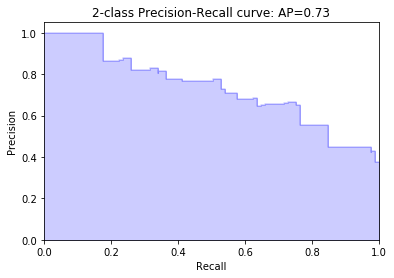

In [64]:
precision, recall, threshold = precision_recall_curve(y_test, probes, pos_label=1)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(20, 10))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

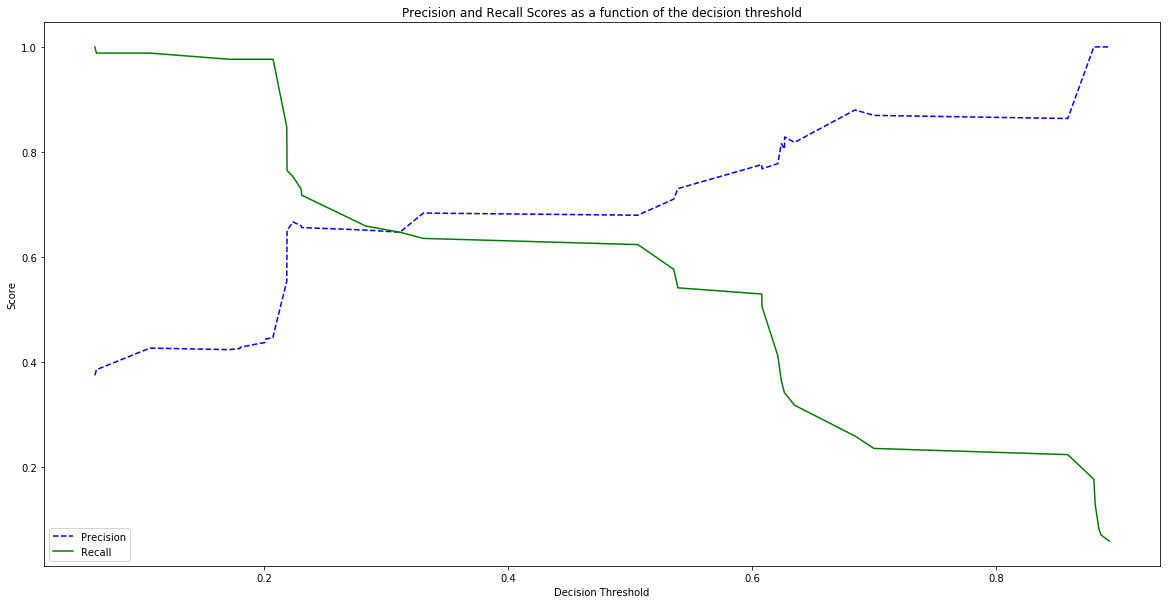

In [66]:
plot_precision_recall_vs_threshold(precision, recall, thresholds=threshold)

In [67]:
print(classification_report(y_test, np.int32(np.array(probes) >= 0.3)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       146
           1       0.65      0.65      0.65        85

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [68]:
confusion_matrix(y_test, np.int32(np.array(probes) >= 0.3))

array([[116,  30],
       [ 30,  55]], dtype=int64)

### Conclusion: advantages and disadvantages, ways to imporve model

Pluses:
1. Simple to explain;
2. Has interpreation;
3. Fast infer;
4. Missing data is not a problem;
5. Supports online training.

Minuses:
1. This implementation can only work with binary features (specail software can build BN with continuous features);
2. Dependance on data (since we chose thresholds for binarization on our features not only from domain knowledge but from data too; continuous BN would solve this problem).
3. Still uses some features that are obtained from invasive methods (can use different features or technology to obtain data);
4. Needs bigger and better data to get better at generalizing (BN still got it nice though).

Bayesian Network was one of the best model for medical tasks (Pathfinder I, II, III; Babylon Health etc.) and still is. It can work with small sample size, missing data, prone to overfitting and has interpretability.
But with the development of the neurobayes approaches, we will be able to see new models for medical diagnosis, health data analysis, individual medicine and decision support systems in the near future.